In [1]:
!pip install country_converter --upgrade

In [2]:
# Data Analysis

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Visualization

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# World map representation
import country_converter as coco
import datetime
import calendar


In [25]:
df=pd.read_csv('World Energy Overview.csv')
pf=pd.read_csv('Production_Total.csv')
cf=pd.read_csv('Consumption_Total.csv')
df.head()

Date  Total Fossil Fuels Production  \
0  1973-01-31                       4.932632   
1  1973-02-28                       4.729582   
2  1973-03-31                       4.946902   
3  1973-04-30                       4.716271   
4  1973-05-31                       4.956995   

   Nuclear Electric Power Production  Total Renewable Energy Production  \
0                           0.068103                           0.403981   
1                           0.064634                           0.360900   
2                           0.072494                           0.400161   
3                           0.064070                           0.380470   
4                           0.062111                           0.392141   

   Total Primary Energy Production  Primary Energy Imports  \
0                         5.404715                1.173080   
1                         5.155115                1.168005   
2                         5.419556                1.309473   
3                         5.160812                1.085169   
4                         5.411246                1.162804   

   Primary Energy Exports  Primary Energy Net Imports  \
0                0.125781                    1.047299   
1                0.120883                    1.047122   
2                0.139950                    1.169523   
3                0.194185                    0.890984   
4                0.196775                    0.966029   

   Primary Energy Stock Change and Other  Total Fossil Fuels Consumption  \
0                               0.771858                        6.747651   
1                               0.390129                        6.163095   
2                              -0.067640                        6.044647   
3                              -0.110067                        5.493184   
4                              -0.305335                        5.613551   

   Nuclear Electric Power Consumption  Total Renewable Energy Consumption  \
0                            0.068103                            0.403981   
1                            0.064634                            0.360900   
2                            0.072494                            0.400161   
3                            0.064070                            0.380470   
4                            0.062111                            0.392141   

   Total Primary Energy Consumption  
0                          7.223873  
1                          6.592366  
2                          6.521439  
3                          5.941729  
4                          6.071940

In [26]:
df.tail()

Date  Total Fossil Fuels Production  \
594  2022-07-31                       6.921426   
595  2022-08-31                       7.047525   
596  2022-09-30                       6.915201   
597  2022-10-31                       7.126618   
598  2022-11-30                       6.875368   

     Nuclear Electric Power Production  Total Renewable Energy Production  \
594                           0.718109                           1.132400   
595                           0.718526                           1.044026   
596                           0.664673                           0.978647   
597                           0.614741                           1.019209   
598                           0.647029                           1.097519   

     Total Primary Energy Production  Primary Energy Imports  \
594                         8.771935                1.907862   
595                         8.810077                1.821828   
596                         8.558521                1.702048   
597                         8.760568                1.767733   
598                         8.619915                1.761697   

     Primary Energy Exports  Primary Energy Net Imports  \
594                2.294320                   -0.386458   
595                2.327090                   -0.505262   
596                2.219831                   -0.517784   
597                2.322475                   -0.554743   
598                2.305923                   -0.544226   

     Primary Energy Stock Change and Other  Total Fossil Fuels Consumption  \
594                               0.199327                        6.736891   
595                               0.225628                        6.755154   
596                              -0.257997                        6.144280   
597                              -0.394651                        6.179721   
598                               0.210202                        6.553431   

     Nuclear Electric Power Consumption  Total Renewable Energy Consumption  \
594                            0.718109                            1.111161   
595                            0.718526                            1.036589   
596                            0.664673                            0.960694   
597                            0.614741                            1.006859   
598                            0.647029                            1.076469   

     Total Primary Energy Consumption  
594                          8.584805  
595                          8.530444  
596                          7.782741  
597                          7.811175  
598                          8.285891

In [5]:
df.shape

(599, 13)

In [6]:
pf.shape

(229, 45)

In [7]:
cf.shape

(230, 45)

In [8]:
df.columns

Index(['Date', 'Total Fossil Fuels Production',
       'Nuclear Electric Power Production',
       'Total Renewable Energy Production', 'Total Primary Energy Production',
       'Primary Energy Imports', 'Primary Energy Exports',
       'Primary Energy Net Imports', 'Primary Energy Stock Change and Other',
       'Total Fossil Fuels Consumption', 'Nuclear Electric Power Consumption',
       'Total Renewable Energy Consumption',
       'Total Primary Energy Consumption'],
      dtype='object')

In [9]:
df.isnull().sum()

Date                                     0
Total Fossil Fuels Production            0
Nuclear Electric Power Production        0
Total Renewable Energy Production        0
Total Primary Energy Production          0
Primary Energy Imports                   0
Primary Energy Exports                   0
Primary Energy Net Imports               0
Primary Energy Stock Change and Other    0
Total Fossil Fuels Consumption           0
Nuclear Electric Power Consumption       0
Total Renewable Energy Consumption       0
Total Primary Energy Consumption         0
dtype: int64

In [10]:
pf.isnull().sum()

Continent           0
Country             0
1980                0
1981                0
1982                0
1983                0
1984                0
1985                0
1986                0
1987                0
1988                0
1989                0
1990                0
1991                0
1992                0
1993                0
1994                0
1995                0
1996                0
1997                0
1998                0
1999                0
2000                0
2001                0
2002                0
2003                0
2004                0
2005                0
2006                0
2007                0
2008                0
2009                0
2010                0
2011                0
2012                0
2013                0
2014                0
2015                0
2016                0
2017                0
2018                0
2019                0
2020                0
2021                0
Total_production    0
dtype: int

In [11]:
cf.isnull().sum()
cf.fillna(0, inplace=True)

In [12]:
print(df.describe())

       Total Fossil Fuels Production  Nuclear Electric Power Production  \
count                     599.000000                         599.000000   
mean                        5.034634                           0.519567   
std                         0.610126                           0.202697   
min                         3.676065                           0.062111   
25%                         4.683559                           0.328635   
50%                         4.831601                           0.594293   
75%                         5.087384                           0.681056   
max                         7.126618                           0.780456   

       Total Renewable Energy Production  Total Primary Energy Production  \
count                         599.000000                       599.000000   
mean                            0.593709                         6.147909   
std                             0.193351                         0.895076   
min             

In [13]:
# Calculating the correlation matrix
corr_matrix = df.corr()
print(corr_matrix)

                                       Total Fossil Fuels Production  \
Total Fossil Fuels Production                               1.000000   
Nuclear Electric Power Production                           0.411684   
Total Renewable Energy Production                           0.851062   
Total Primary Energy Production                             0.958719   
Primary Energy Imports                                      0.051540   
Primary Energy Exports                                      0.925480   
Primary Energy Net Imports                                 -0.655291   
Primary Energy Stock Change and Other                      -0.005999   
Total Fossil Fuels Consumption                              0.189429   
Nuclear Electric Power Consumption                          0.411684   
Total Renewable Energy Consumption                          0.847192   
Total Primary Energy Consumption                            0.401573   

                                       Nuclear Electric Power P

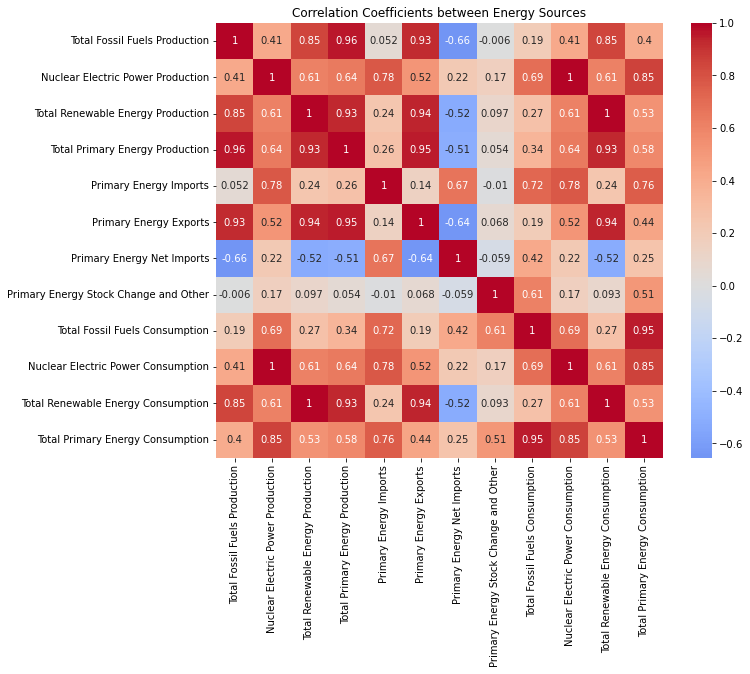

In [14]:
# Calculate the correlation coefficients between the energy sources and other factors
corr_cols = ['Total Fossil Fuels Production', 'Nuclear Electric Power Production', 'Total Renewable Energy Production',
             'Total Primary Energy Production', 'Primary Energy Imports', 'Primary Energy Exports',
             'Primary Energy Net Imports', 'Primary Energy Stock Change and Other', 'Total Fossil Fuels Consumption',
             'Nuclear Electric Power Consumption', 'Total Renewable Energy Consumption', 'Total Primary Energy Consumption']
corr_df = df[corr_cols].corr()

# Set the size of the plot
plt.figure(figsize=(10, 8))

# Plot the data using a heatmap
sns.heatmap(corr_df, annot=True, cmap='coolwarm', center=0)

# Set plot title
plt.title('Correlation Coefficients between Energy Sources')

# Show the plot
plt.show()


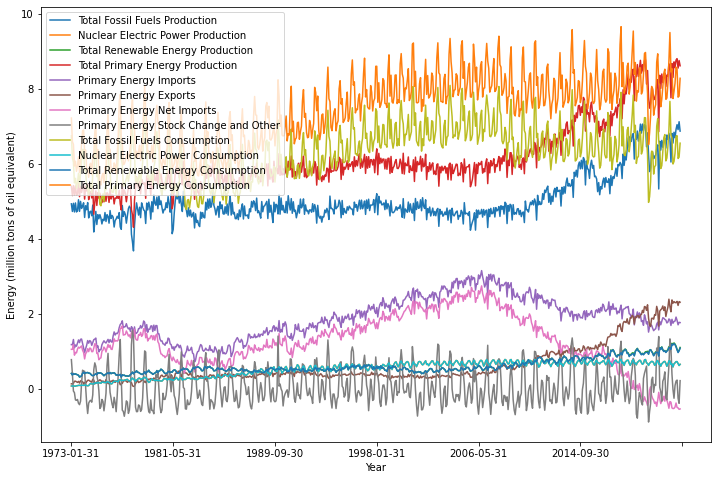

In [15]:
# Setting the date column as the index
df.set_index('Date', inplace=True)

# Ploting the data
df[df.columns].plot(figsize=(12,8))

plt.xlabel('Year')
plt.ylabel('Energy (million tons of oil equivalent)')

fig = px.line(df, x=df.index, y=df.columns, title='Time Series Data for Energy Production and Consumption')
fig.update_xaxes(rangeslider_visible=True)


# displays the plot
fig.show()

In [16]:
top_pf = pf[['Country', 'Total_production']].sort_values(by=['Total_production'], ascending=False).head(10)

fig = px.bar(top_pf, x='Country', y='Total_production',labels={
                     "Country": "Countries",
                     "Total_production": "Total Production"
                 },title='Top 10 Countries with the Highest Energy Production:', width=850, height=600)
fig.show()

In [17]:
continent_pf =  pf.groupby(by='Continent')['Total_production'].sum()
print(continent_pf)

fig = px.pie(pf, values='Total_production', names='Continent',color='Continent',
             title='Continent-wise total energy production of the World',
             width=850, height=600)
fig.show()

Continent
    Africa                     1136.607828
    Asia & Oceania             4513.091785
    Central & South America    1007.329117
    Eurasia                    2871.262313
    Europe                     2006.767697
    Middle East                2416.979487
    North America              4203.165946
Name: Total_production, dtype: float64


In [18]:
country = coco.convert(names = cf['Country'], to = "ISO3")
cf['Country'] = country

fig = px.choropleth(locations = cf.Country,
                    color = cf.Total_Consumption,
                    color_continuous_scale = [[0, 'rgb(166,206,227, 0.5)'],
                      [0.005, 'rgb(31,120,180,0.5)'],
                      [0.09, 'rgb(178,223,138,0.5)'],
                      [0.2, 'rgb(51,160,44,0.5)'],
                      [0.7, 'rgb(251,154,153,0.5)'],
                      [0.9, 'rgb(227,26,28,0.5)'],
                      [1, 'rgb(227,26,28,0.5)']
                     ],
                    title = 'Global Energy Consumption')
fig.update_layout(height=630, width=850)
fig.show()




        Hawaiian Trade Zone not found in regex
        Samoa not found in regex
        U.S. Pacific Islands not found in regex
        Wake Island not found in regex
        Netherlands Antilles not found in regex
        U.S. Territories not found in regex
        Former Serbia and Montenegro not found in regex
        Former Yugoslavia not found in regex
        Germany, East not found in regex
        Germany, West not found in regex
        Former U.S.S.R. not found in regex


In [19]:
top_consumption = cf[['Country', 'Total_Consumption']].sort_values(by=['Total_Consumption'], ascending=False).head(10)

fig = px.bar(top_consumption, x='Country', y='Total_Consumption',labels={
                     "Country": "Countries",
                     "Total_production": "Total Production"
                 },title='Top 10 Countries with the Highest Energy Consumption:', width=850, height=600)
fig.show()

In [20]:
continent_consumption =  cf.groupby(by='Continent')['Total_Consumption'].sum()
print(continent_consumption)

fig = px.pie(cf, values='Total_Consumption', names='Continent',color='Continent',
             title='Continent-wise total energy consumption of the World',
             width=850, height=600)
fig.show()

Continent
Africa                      559.693585
Asia & Oceania             5890.712088
Central & South America     858.645159
Eurasia                    2015.012531
Europe                     3387.844503
Middle East                 873.845333
North America              4614.115501
Name: Total_Consumption, dtype: float64


In [21]:
country = coco.convert(names = cf['Country'], to = "ISO3")
cf['Country'] = country

fig = px.choropleth(locations = cf.Country,
                    color = cf.Total_Consumption,
                    color_continuous_scale = [[0, 'rgb(166,206,227, 0.5)'],
                      [0.005, 'rgb(31,120,180,0.5)'],
                      [0.09, 'rgb(178,223,138,0.5)'],
                      [0.2, 'rgb(51,160,44,0.5)'],
                      [0.7, 'rgb(251,154,153,0.5)'],
                      [0.9, 'rgb(227,26,28,0.5)'],
                      [1, 'rgb(227,26,28,0.5)']
                     ],
                    title = 'Global Energy Consumption')
fig.update_layout(height=630, width=850)
fig.show()

not found not found in regex
not found not found in regex
not found not found in regex
not found not found in regex
not found not found in regex
not found not found in regex
not found not found in regex
not found not found in regex
not found not found in regex
not found not found in regex
not found not found in regex


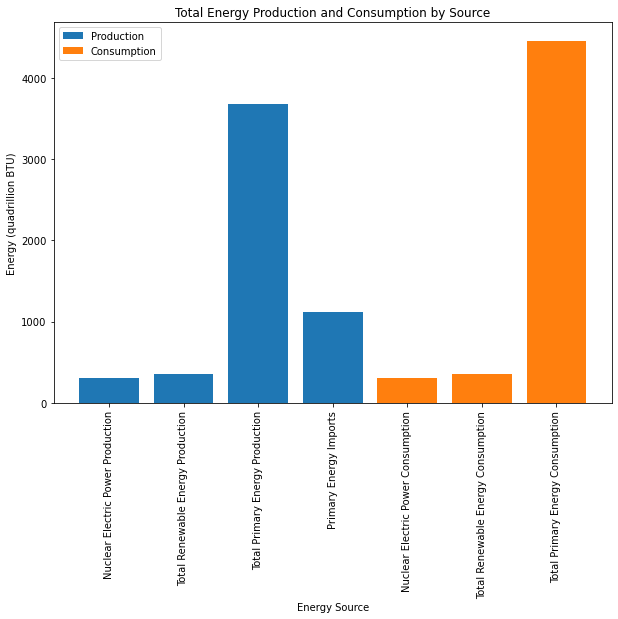

In [22]:
# Calculating total production and consumption for each energy source
total_pf = df.iloc[:, 1:5].sum()
total_cf = df.iloc[:, 9:13].sum()

# Creating a bar chart of the total production and consumption for each energy source
fig, ax = plt.subplots(figsize=(10, 7))
ax.bar(total_pf.index, total_pf.values, label='Production')
ax.bar(total_cf.index, total_cf.values, label='Consumption')
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.title('Total Energy Production and Consumption by Source', fontsize=12)
plt.xlabel('Energy Source', fontsize=10)
plt.ylabel('Energy (quadrillion BTU)', fontsize=10)
plt.legend(fontsize=10)
plt.show()

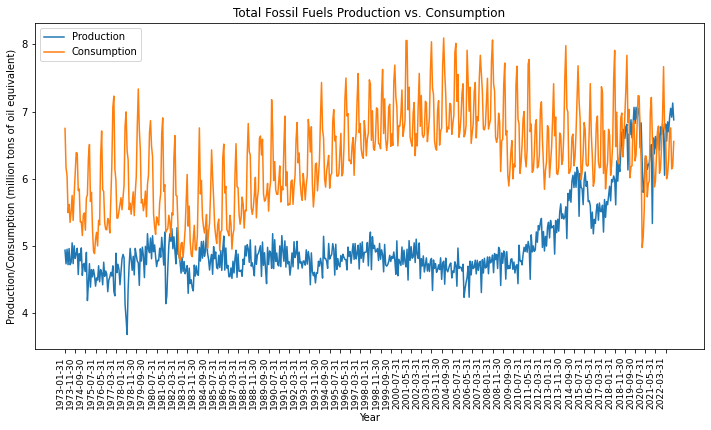

In [23]:
# Plotting the Total Fossil Fuels Production vs. Consumption
plt.figure(figsize=(12,6))
plt.plot(df['Total Fossil Fuels Production'], label='Production')
plt.plot(df['Total Fossil Fuels Consumption'], label='Consumption')
plt.title('Total Fossil Fuels Production vs. Consumption')
plt.xlabel('Year')
plt.xticks(df.index[::10], rotation=90, ha='right', fontsize=9)
plt.ylabel('Production/Consumption (million tons of oil equivalent)')
plt.legend()
plt.show()


In [27]:
datax1 = df.filter(['Total Primary Energy Production','Total Primary Energy Consumption', 'Date'], axis=1)
datax2 = datax1.rename(columns={'Total Primary Energy Production':'Total_Production', 
                                                     'Total Primary Energy Consumption':'Total_Consumption'})
datax2 = datax2.set_index('Date')
datax2.head()

fig = px.line(datax2, x=datax2.index, y=datax2.columns,
              title='Energy Production vs Consumption',width=850, height=500)
fig.update_xaxes(rangeslider_visible=True)
fig.show()

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(go.Pie(
    values= [3015.745538, 355.6315180000005, 311.220662],
    labels=['Total Fossil Fuels Production', 'Total Renewable Energy Production', 'Nuclear Electric Power Production'],
    domain=dict(x=[0, 0.5]),
    title='Production'),
    row=1, col=1)
              
fig.add_trace(go.Pie(
    values= [3786.513071, 354.38061200000004, 311.220662],
    labels=['Total Fossil Fuels Consumption', 'Total Renewable Energy Consumption', 'Nuclear Electric Power Consumption'],
    domain=dict(x=[0, 0.5]),
    title='Consumption'),
    row=1, col=2)

fig.update_layout(height=500, width=850)
fig.show()


labels = ['Total Production','Total Consumption']
values = [3682.597704, 4457.458121]

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(width=850, height=500)
fig.show()